# Population change of Korea

Data crawling from wikipedia(https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC)

by using pandas.read_html() function

In [1]:
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
url = "https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC"

In [3]:
# pip install lxml
#웹 페이지에 있는 table 을 가져온다
table = pd.read_html(url) 
len(table)

3

In [4]:
table[0]

,구간,연평균 출생아수,연평균 사망자수,연평균 자연증가,조출생률,조사망률,자연증가율,합계출산율,영아사망률
0,1950–1955,722000,331000,391000,35.8,16.4,19.4,5.05,138.0
1,1955–1960,1049000,356000,693000,45.4,15.4,30.0,6.33,114.4
2,1960–1965,1067000,347000,720000,39.9,13.0,27.0,5.63,89.7
3,1965–1970,985000,298000,687000,32.9,9.9,23.0,4.71,64.2
4,1970–1975,1004000,259000,746000,30.4,7.8,22.5,4.28,38.1
5,1975–1980,833000,253000,581000,23.1,7.0,16.1,2.92,33.2
6,1980–1985,795000,248000,547000,20.4,6.4,14.0,2.23,24.6
7,1985–1990,647000,239000,407000,15.5,5.7,9.8,1.60,14.9
8,1990–1995,702000,239000,463000,16.0,5.5,10.6,1.70,9.7
9,1995–2000,615000,247000,368000,13.6,5.5,8.1,1.51,6.6


In [5]:
df = table[1]
df.shape

(95, 9)

In [6]:
df.tail()

,연도 (년),추계인구(명),출생자수(명),사망자수(명),자연증가수(명),조출생률(%),조사망률(%),자연증가율(%),합계출산율(%)
90,2015,51014947.0,438420,275895,162925,8.6,5.4,3.2,1.24
91,2016,51245707.0,406243,280827,125416,7.9,5.5,2.4,1.17
92,2017,51446201.0,357771,285534,72237,7.0,5.5,1.5,1.05
93,2018,51635256.0,326822,298820,28002,6.4,5.8,0.6,0.98
94,2019,NaN,303054,295132,7922,5.9,5.7,0.2,0.92


## seaborn

In [7]:
import seaborn as sns
sns.set(font="Malgun Gothic") # 한글 깨짐 방지

import matplotlib.pyplot as plt

In [8]:
# 디스플레이가 retina 를 지원할 경우, 폰트가 더 선명해짐
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

### Population

<AxesSubplot:xlabel='연도 (년)', ylabel='추계인구(명)'>

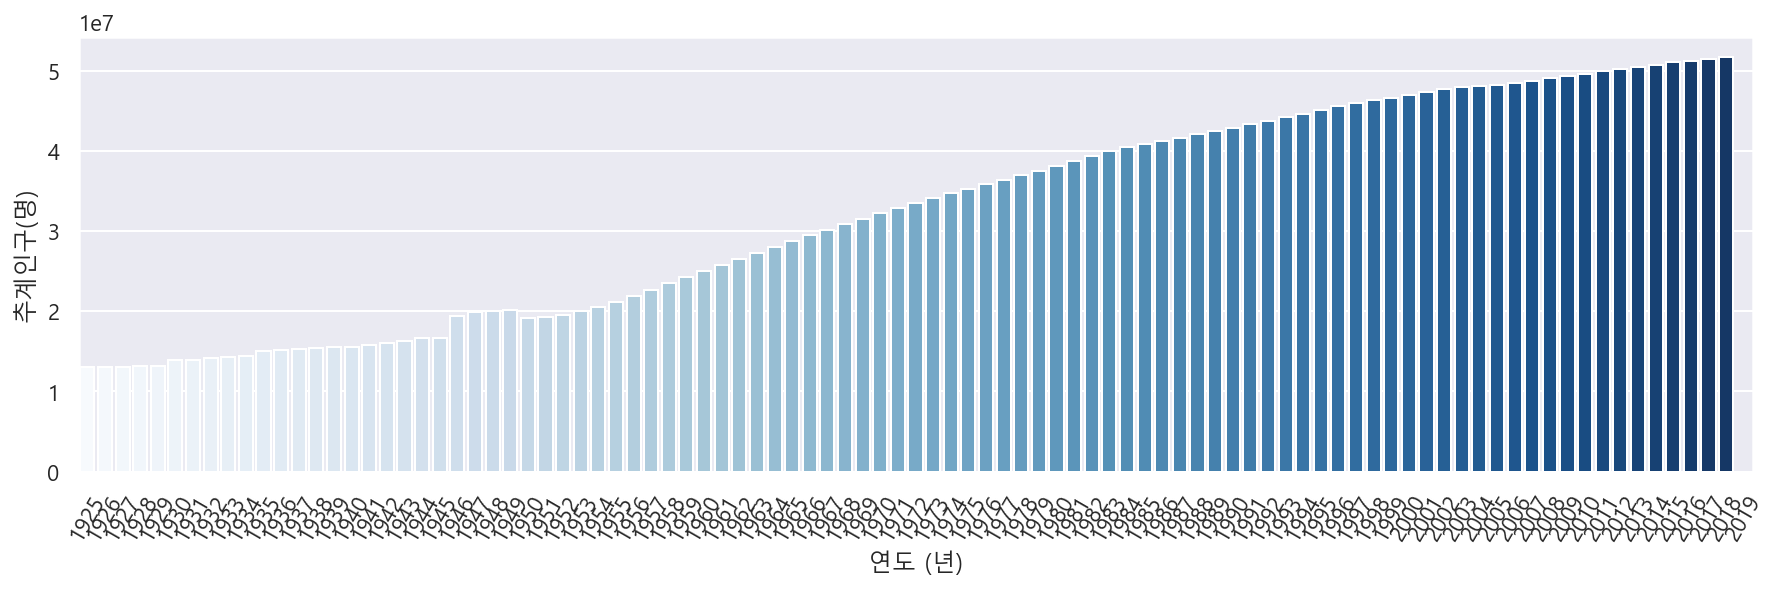

In [9]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=60)
sns.barplot(data= df, x="연도 (년)", y="추계인구(명)", palette="Blues")

<AxesSubplot:xlabel='연도 (년)', ylabel='추계인구(명)'>

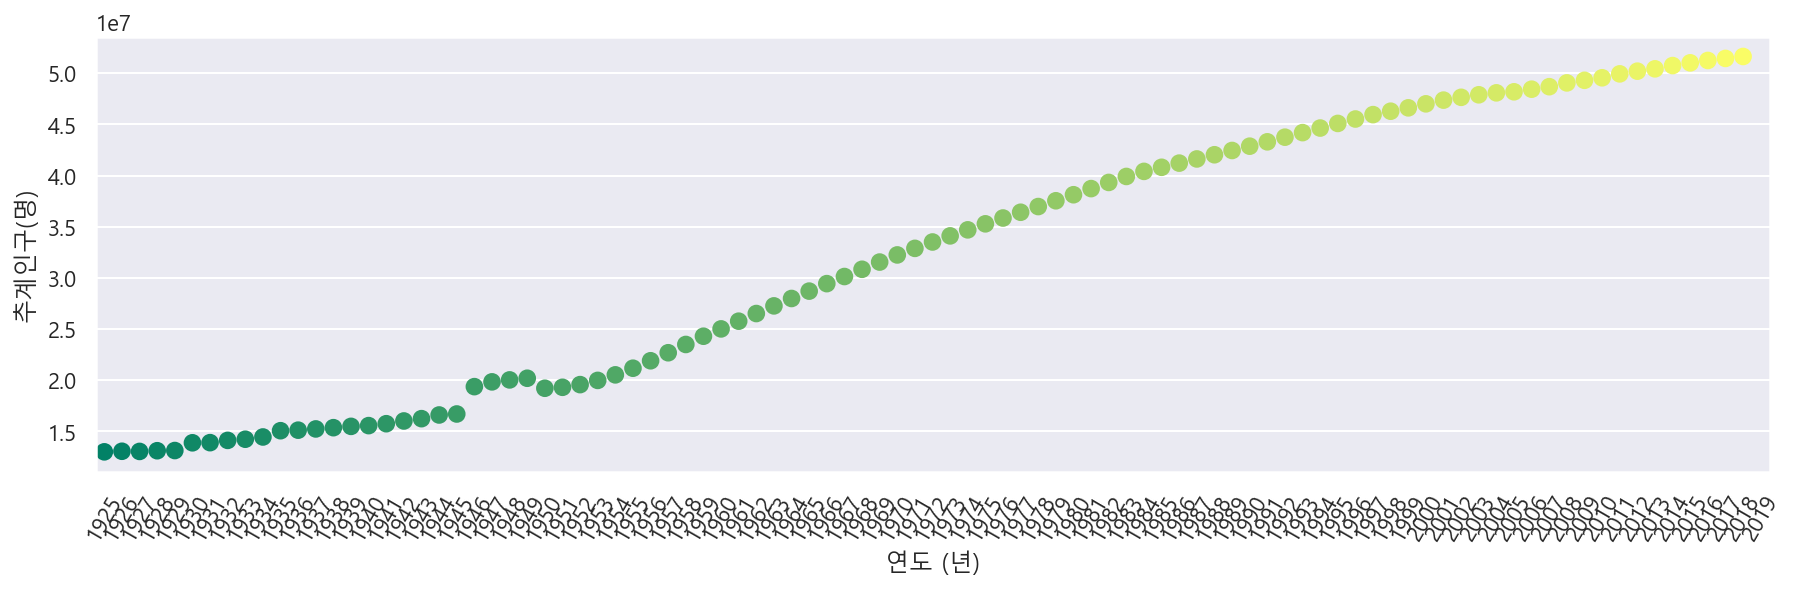

In [10]:
plt.figure(figsize = (15,4)) # 그래프 사이즈 조정
plt.xticks(rotation=60) # 글씨가 겹칠경우 기울여서 표시
sns.pointplot(data=df, x="연도 (년)", y="추계인구(명)", palette = "summer")

### Birth rate

<AxesSubplot:xlabel='연도 (년)', ylabel='출생자수(명)'>

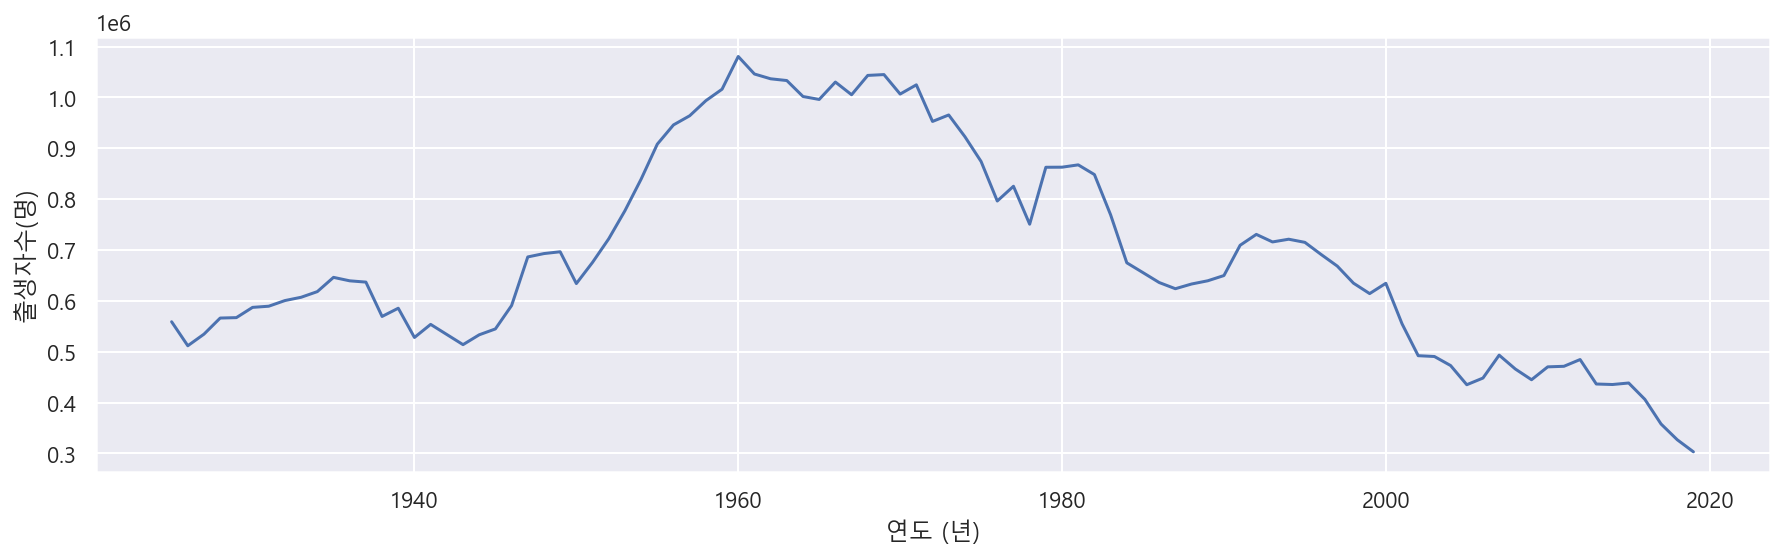

In [11]:
plt.figure(figsize = (15,4))
sns.lineplot(data=df, x="연도 (년)", y="출생자수(명)")
# 1e6 = 10**6 (십만)

### Number of Death

<AxesSubplot:xlabel='연도 (년)', ylabel='사망자수(명)'>

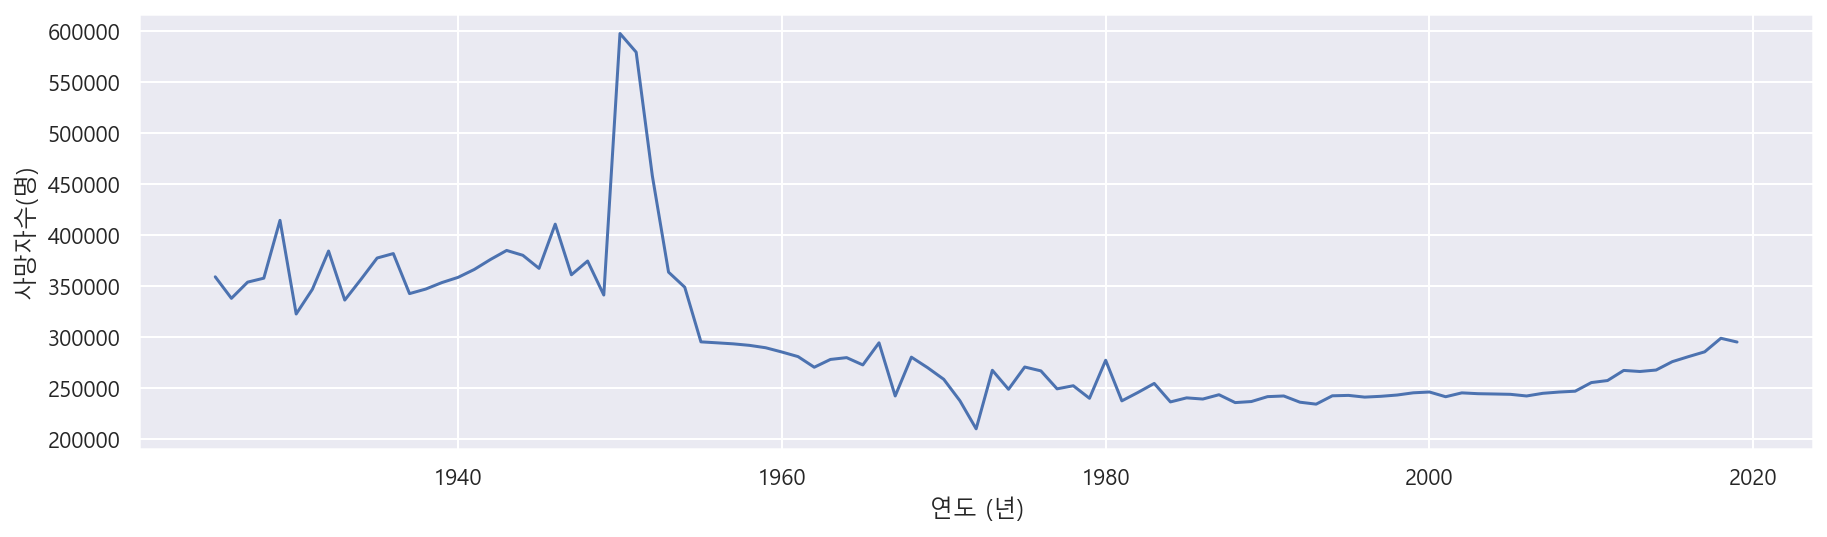

In [12]:
plt.figure(figsize = (15,4))
sns.lineplot(data=df, x="연도 (년)", y="사망자수(명)")

### Birth and Death

<AxesSubplot:xlabel='연도 (년)', ylabel='사망자수(명)'>

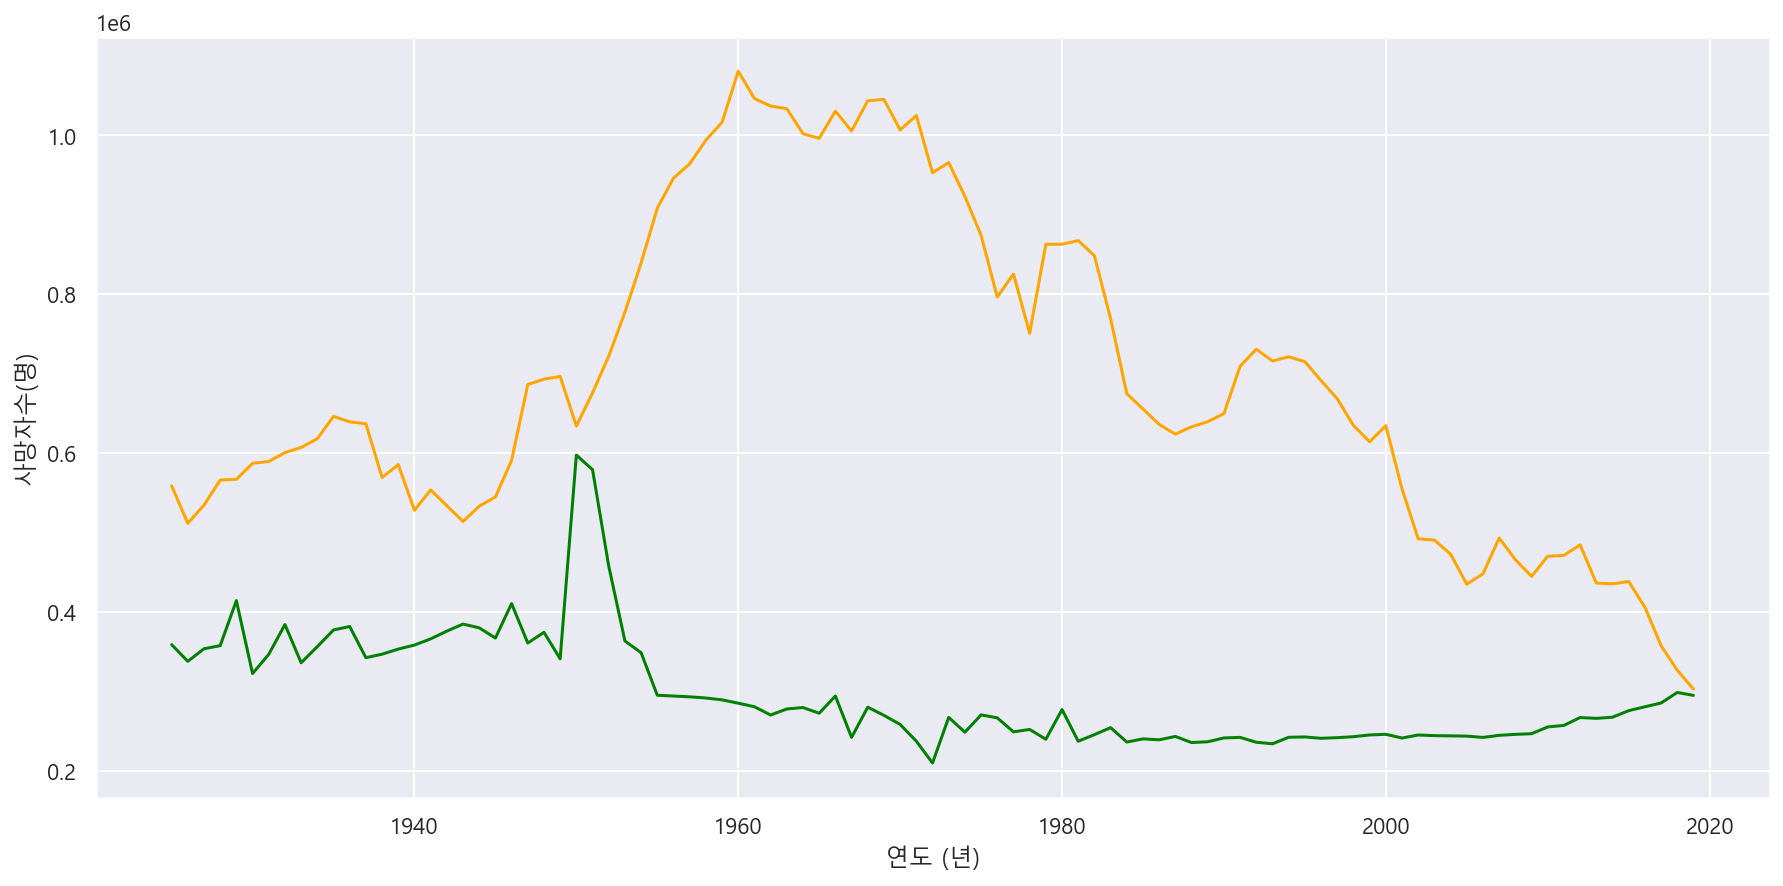

In [13]:
plt.figure(figsize = (15,7))
sns.lineplot(data=df, x="연도 (년)", y="출생자수(명)", color ="orange")
sns.lineplot(data=df, x="연도 (년)", y="사망자수(명)", color = "green")

## Pandas plot()

In [14]:
df.columns

Index(['연도 (년)', '추계인구(명)', '출생자수(명)', '사망자수(명)', '자연증가수(명)', '조출생률(%)',
       '조사망률(%)', '자연증가율(%)', '합계출산율(%)'],
      dtype='object')

In [15]:
df_pop = df[['연도 (년)', '출생자수(명)', '사망자수(명)']]
df_pop = df_pop.set_index("연도 (년)") # df 칼럼을 인덱스로 사용하기 위해
df_pop.head()

,출생자수(명),사망자수(명)
연도 (년),,
1925,558897,359042
1926,511667,337948
1927,534524,353818
1928,566142,357701
1929,566969,414366


### Birth and Death

<AxesSubplot:xlabel='연도 (년)'>

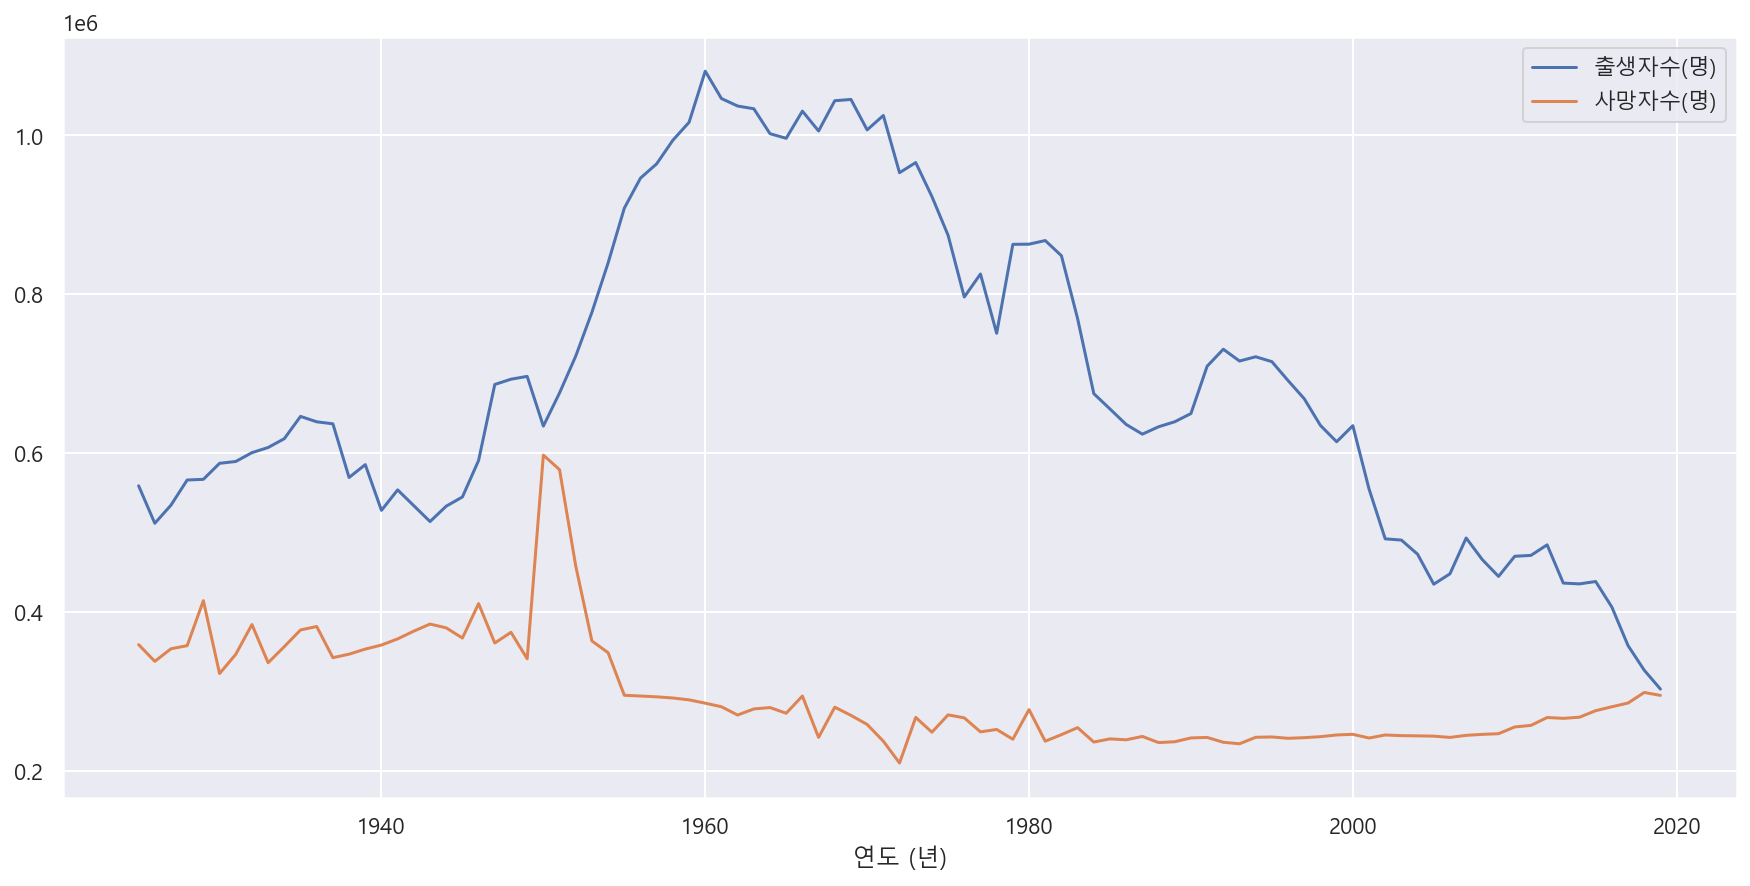

In [16]:
df_pop.plot(figsize=(15,7)) # 판다스에서 플롯 그리기

### Recent 50 years of graph

<AxesSubplot:xlabel='연도 (년)'>

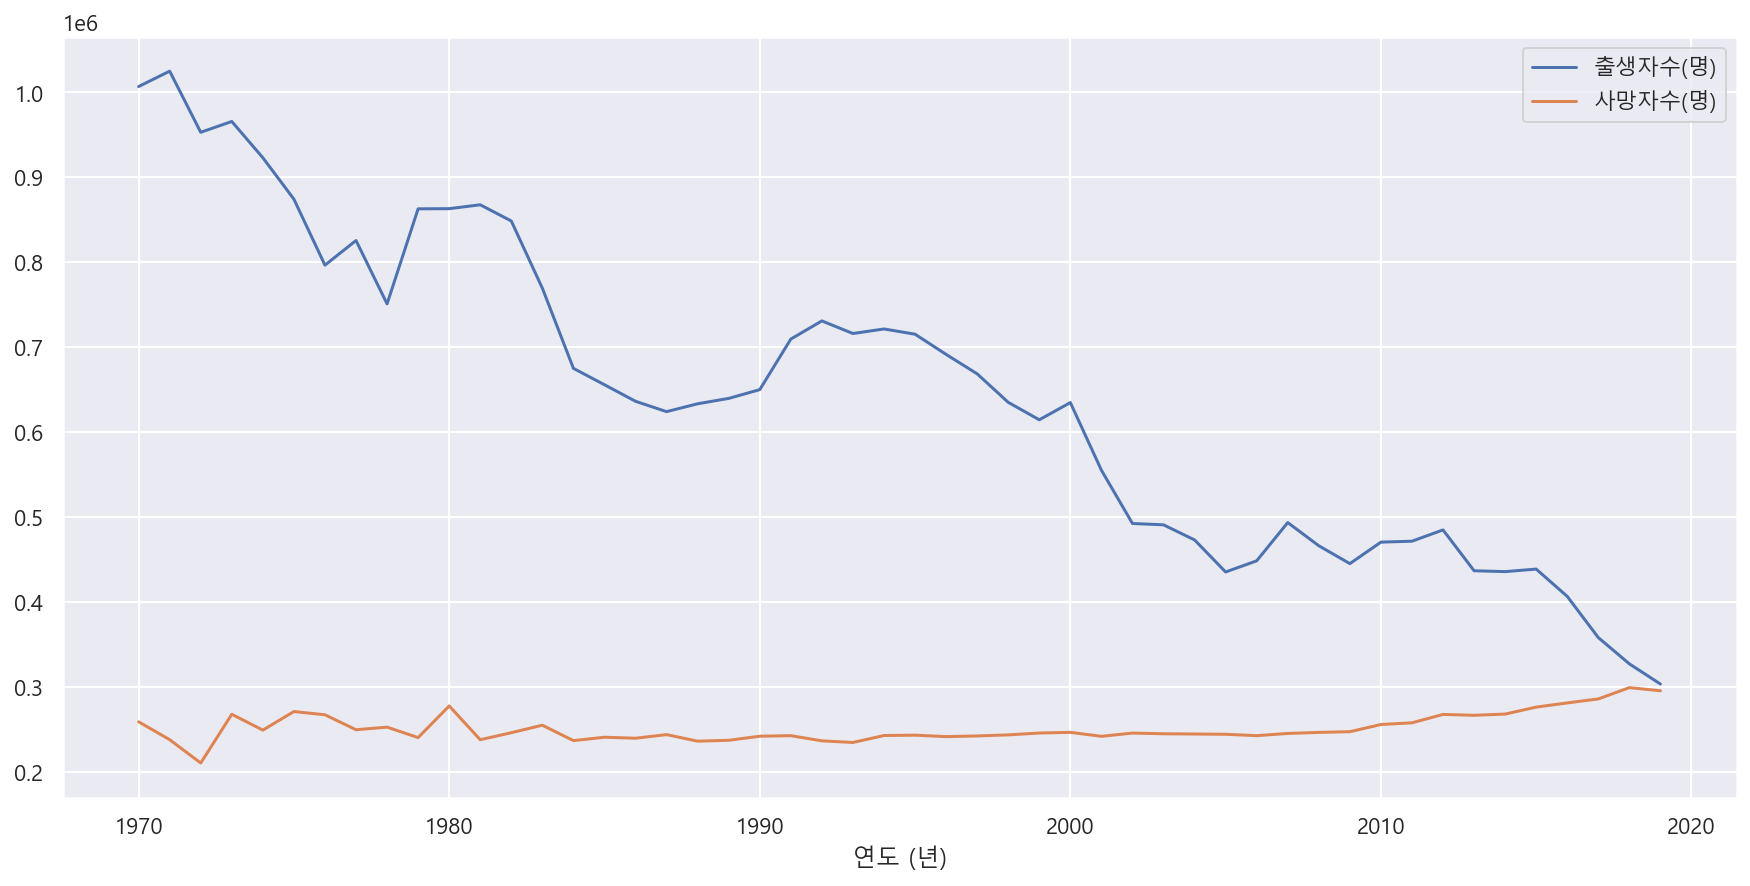

In [17]:
df_pop[-50:].plot(figsize=(15,7)) # 끝에서 50개의 데이터만 그리기
# sns.lineplot(data=df[:-50], x="연도 (년)", y="출생자수(명)", color ="orange")